In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [212]:
df = pd.read_csv("data/final_project.csv")

In [213]:
df.head(3)

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold      4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

In [215]:
df.describe()

,jumlah_review,presentase_diskon,price,product_id,quantity_sold,rating
count,4503.000000,4503.0,4.503000e+03,4.503000e+03,4503.000000,4503.000000
mean,23.664446,0.0,9.780626e+04,2.822469e+08,69.367311,4.879636
std,71.927542,0.0,8.468117e+04,8.180762e+07,252.428009,0.339455
min,0.000000,0.0,7.500000e+03,1.432960e+06,0.000000,0.000000
25%,3.000000,0.0,5.490000e+04,2.434286e+08,2.000000,5.000000
50%,8.000000,0.0,7.800000e+04,3.025641e+08,12.000000,5.000000
75%,24.000000,0.0,1.190000e+05,3.510548e+08,41.000000,5.000000
max,1629.000000,0.0,2.200000e+06,3.761936e+08,6401.000000,5.000000


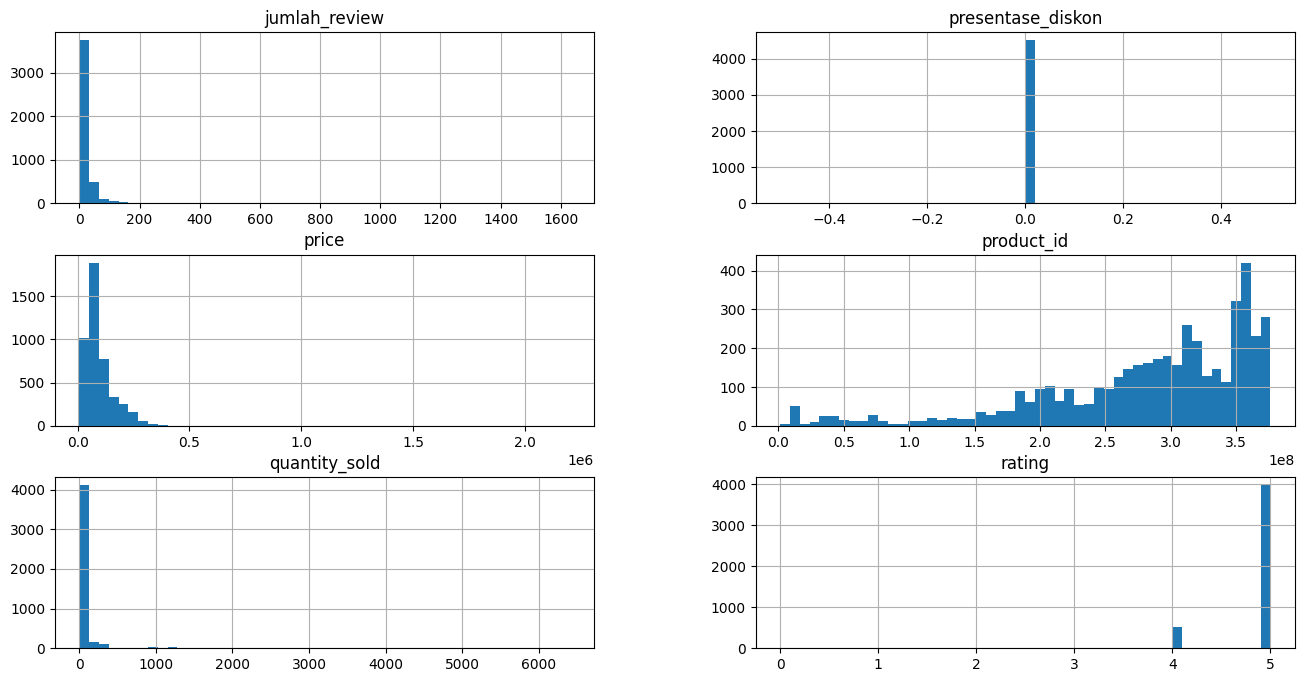

In [216]:
df.hist(bins=50, figsize=(16,8))
plt.show()

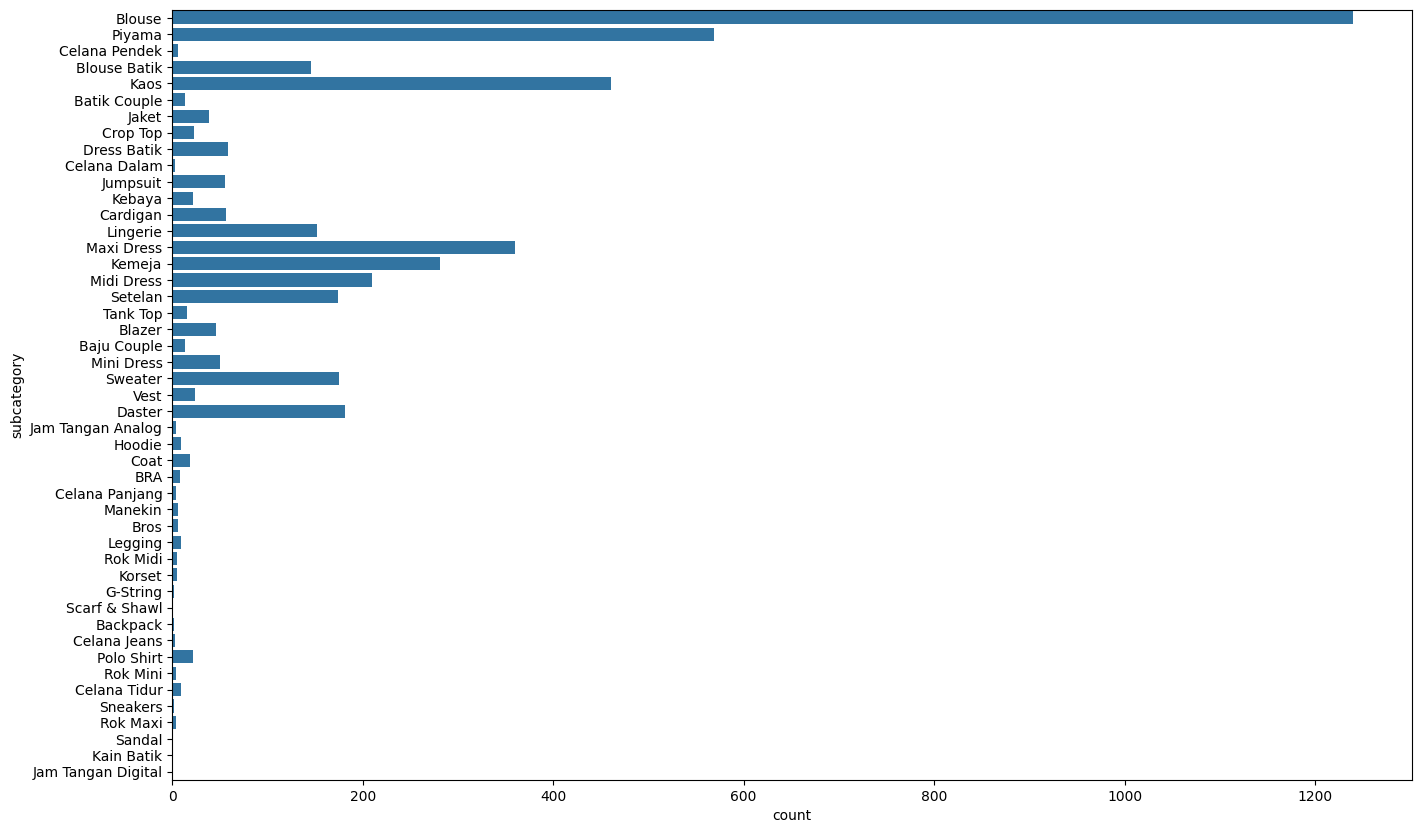

In [217]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, y="subcategory")
plt.show()

<Axes: >

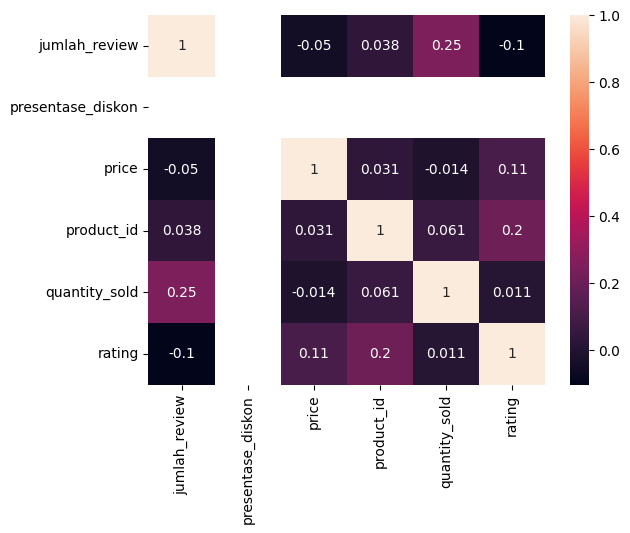

In [218]:
df_numerik = df.select_dtypes(include=[np.number])

sns.heatmap(df_numerik.corr(), annot=True)


In [219]:
df.isnull().sum()

category             0
city                 0
gold_merchant        0
image_url            0
jumlah_review        0
jumlah_view          0
location             0
presentase_diskon    0
price                0
product_id           0
quantity_sold        0
rating               0
shop_name            0
subcategory          0
title                0
url                  0
dtype: int64

In [220]:
df.duplicated().sum()

0

In [221]:
columns_to_drop = ["category", "city", "image_url", "location", "presentase_diskon", "product_id", "shop_name", "title", "url"]
existing_columns = df.columns.intersection(columns_to_drop)

print(existing_columns)

df.drop(columns=existing_columns, inplace=True)


Index(['category', 'city', 'image_url', 'location', 'presentase_diskon',
       'product_id', 'shop_name', 'title', 'url'],
      dtype='object')


In [222]:
print(df.columns)

Index(['gold_merchant', 'jumlah_review', 'jumlah_view', 'price',
       'quantity_sold', 'rating', 'subcategory'],
      dtype='object')


In [223]:
df["gold_merchant"] = df["gold_merchant"].astype(int)

In [224]:
df["jumlah_view"] = pd.to_numeric(df["jumlah_view"], errors="coerce")

In [225]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["subcategory"] = label_encoder.fit_transform(df["subcategory"])

In [226]:
df.dropna(inplace=True)

In [227]:
df = df.apply(lambda x: np.log1p(x))

In [228]:
df.describe()

,gold_merchant,jumlah_review,jumlah_view,price,quantity_sold,rating,subcategory
count,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000,4104.000000
mean,0.334582,2.307719,0.363594,11.286535,2.399602,1.770929,2.874400
std,0.346408,1.154515,1.498057,0.635667,1.836031,0.069227,0.802491
min,0.000000,0.000000,0.000000,8.922792,0.000000,0.000000,0.000000
25%,0.000000,1.386294,0.000000,10.913287,0.693147,1.791759,1.791759
50%,0.000000,2.079442,0.000000,11.264477,2.397895,1.791759,3.258097
75%,0.693147,3.091042,0.000000,11.695255,3.713572,1.791759,3.526361
max,0.693147,7.396335,10.691968,14.603968,8.685078,1.791759,3.850148


In [229]:
X = df[["gold_merchant", "jumlah_review", "jumlah_view", "quantity_sold", "rating", "gold_merchant"]]
y = df["price"]

In [230]:
y_inverse = np.exp(y)

In [231]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(random_state=42)

cv_score = cross_val_score(rfg, X, y, cv=5, scoring="r2")

print(cv_score.mean())

-0.11944842386699797


In [232]:
print(cv_score)

[-0.10121281 -0.00212895 -0.44131499 -0.05446376  0.00187838]


In [233]:
from sklearn.model_selection import train_test_split

In [234]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [236]:
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [237]:
y_pred = rfg.predict(X_test)

In [238]:
y_pred = np.exp(y_pred)

In [242]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(y_test, y_pred))

96375.18873729477


In [271]:
df_new = pd.read_csv("data/final_project.csv")
df_new = df_new[:4104]

In [272]:
X = df[["gold_merchant", "jumlah_review", "quantity_sold", "subcategory", "gold_merchant"]]
y = df_new["rating"]

y = y.apply(lambda x: "satu" if x == 1 else "dua" if x == 2 else "tiga" if x == 3 else "empat" if x == 4 else "lima" if x == 5 else "enam")

In [273]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(random_state=42)

cv_score = cross_val_score(rfg, X, y, cv=5)

print(cv_score.mean())

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.5816984046819762


In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [277]:
rfg.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [278]:
y_pred = rfg.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score

In [280]:
print(accuracy_score(y_test, y_pred))


0.8599269183922046
